##ChooserOption
Chooser Option(초이저 옵션)은 옵션 만기 이전의 특정 시점에서 옵션 보유자가 콜 옵션 또는 풋 옵션 중 하나를 선택할 수 있는 옵션입니다. 초이저 옵션은 유연성을 제공하여 기초 자산의 미래 가격 변동성을 활용할 수 있는 장점을 갖습니다.



[*********************100%%**********************]  1 of 1 completed


Chooser Option Price: 25.73


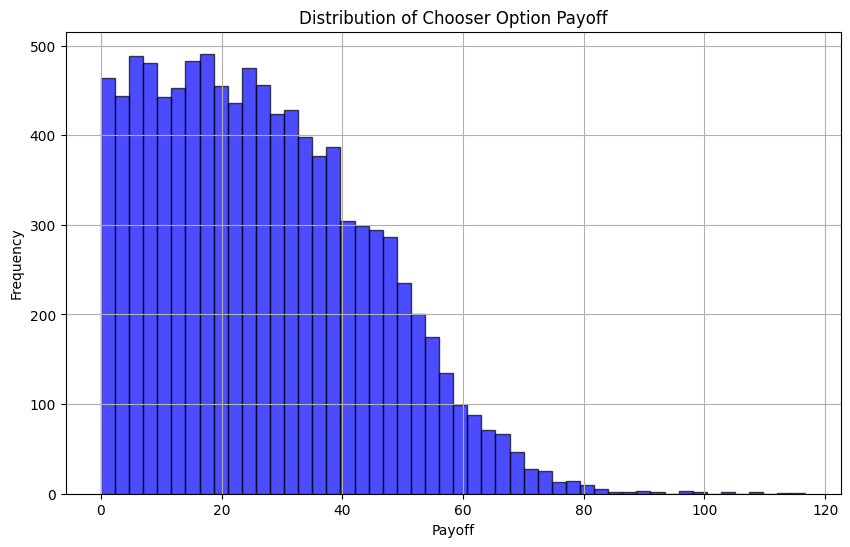

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

def simulate_stock_paths(S0, r, sigma, T, M, I):
    """
    주식 가격 경로 시뮬레이션 함수

    Parameters:
    S0: 초기 주식 가격
    r: 무위험 이자율
    sigma: 변동성
    T: 만기 시간 (단위: 년)
    M: 기간 수 (단위: 일)
    I: 시뮬레이션 수

    Returns:
    주식 가격 경로 배열 (I x M)
    """
    dt = T / M
    paths = np.zeros((I, M + 1))
    paths[:, 0] = S0
    for t in range(1, M + 1):
        z = np.random.standard_normal(I)
        paths[:, t] = paths[:, t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * z)
    return paths

def chooser_option_payoff(paths, K, choice_date):
    """
    초이저 옵션의 페이오프 계산 함수

    Parameters:
    paths: 주식 가격 경로 배열 (I x M)
    K: 행사가격
    choice_date: 콜 또는 풋을 선택하는 날짜

    Returns:
    초이저 옵션의 페이오프 배열
    """
    call_payoff_at_maturity = np.maximum(paths[:, -1] - K, 0)
    put_payoff_at_maturity = np.maximum(K - paths[:, -1], 0)
    call_payoff_at_choice_date = np.maximum(paths[:, choice_date] - K, 0)
    put_payoff_at_choice_date = np.maximum(K - paths[:, choice_date], 0)

    chooser_payoff = np.maximum(call_payoff_at_maturity, put_payoff_at_maturity)
    return chooser_payoff

# yfinance를 사용하여 데이터 다운로드
ticker = 'AAPL'
data = yf.download(ticker, start="2023-01-01", end="2023-12-31")
closing_prices = data['Close'].values

# 초이저 옵션 파라미터 설정
S0 = closing_prices[0]  # 초기 주식 가격
r = 0.05  # 무위험 이자율
sigma = 0.2  # 변동성
T = 1  # 만기 시간 (1년)
M = 252  # 기간 수 (일 단위)
I = 10000  # 시뮬레이션 수
K = 150  # 행사가격
choice_date = 126  # 옵션을 선택하는 날짜 (6개월)

# 주식 가격 경로 시뮬레이션
paths = simulate_stock_paths(S0, r, sigma, T, M, I)

# 초이저 옵션 페이오프 계산
chooser_payoffs = chooser_option_payoff(paths, K, choice_date)

# 초이저 옵션 가격 계산 (할인된 페이오프 평균)
chooser_price = np.exp(-r * T) * np.mean(chooser_payoffs)
print(f"Chooser Option Price: {chooser_price:.2f}")

# 시각화
plt.figure(figsize=(10, 6))
plt.hist(chooser_payoffs, bins=50, color='blue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Chooser Option Payoff')
plt.xlabel('Payoff')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
